In [2]:
!pip install pyspark

In [3]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
%pip install tensorflow

In [5]:
# Step 2: Load and Preprocess MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Reshape to add channel dimension and normalize
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [7]:
# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [8]:
# Step 3: Build CNN Model (Updated to avoid input_shape warning)
model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # Recommended way to define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [9]:
# Step 4: Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Step 5: Train Model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Step 6: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.8702 - loss: 0.4305 - val_accuracy: 0.9842 - val_loss: 0.0547
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9835 - loss: 0.0527 - val_accuracy: 0.9878 - val_loss: 0.0417
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9882 - loss: 0.0363 - val_accuracy: 0.9882 - val_loss: 0.0402
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9923 - loss: 0.0249 - val_accuracy: 0.9895 - val_loss: 0.0351
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9938 - loss: 0.0200 - val_accuracy: 0.9897 - val_loss: 0.0323
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9883 - loss: 0.0352
Test accuracy: 0.9909


In [11]:
# Step 6: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9883 - loss: 0.0352
Test accuracy: 0.9909


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Figure size 800x600 with 0 Axes>

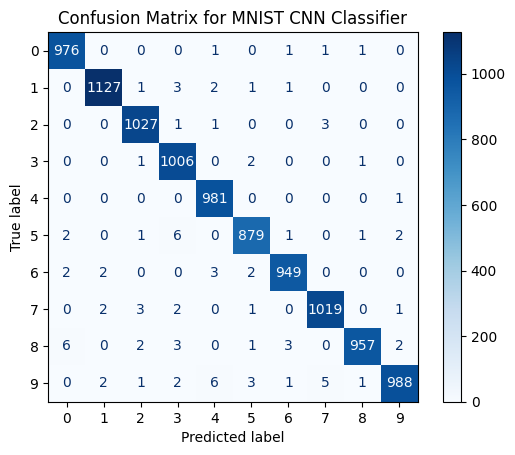

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities
y_pred_probs = model.predict(x_test)

# Convert predictions and true labels from one-hot to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MNIST CNN Classifier")
plt.show()
